Descripcion del proyecto
Descripcion del Dataset:
 1) ### Objetivo del documento
El documento pretende mostrar los requerimientos, alcance del proyecto y orden en que se debe vizualizar los notebooks para una correcta conclusión.

- Resumen ejecutivo
- Integración y limpieza de datos
- Exploración de datos & Ingeniería de características

--------------------------------------------------------------------
- Modelado
- Prototipo
- Pruebas unitarias
- Pruebas de integración (pipeline completo ejecutandose)
- Resultados y concluciones (slides)

## Conclusiones
- Se logro la meta de prototipar una solución, es decir , un algoritmos de machine learning que logre predecir si lloverá con una exactitud arriba del 75 %.
- Se experimento con dos algoritmos, de los cuales se seleccionó el de mayor rendimiento
- El algoritmo selecccionado es una regresión logística y su rendimiento es de 85 % 
- La búsqueda de hiperparámetros indica que el desvalanceo de clases no es un problema para el algoritmo de RL
- Se utilizó MLFlow para llevar un control de los diferentes resultados de la búsqueda y el versionamiento de los experimentos (al menos para la RL)
- De forma rápida (por falta de tiempo para una mayor análisis)concluimos que características puede ser irrelevantes y cuales tiene mayor pesos (positivo y negativo) para la predicción
- De acuerdo a los resultados arrojados por el algoritmo RL, nuestra solución es un modelo estable.

## Discusión

Debido a el sprig de dos día no fue posible:
    
- Análizar las variables de forma más puntual
- Experimentar con mas transformaciones para las carácteristicas
- Experimentar con técnicas más complejas de machine learning
- Versionar el código y subirlo al github
- Refactorizar el código
- Finalizar la clase prototipo de python
- Falto indagar en las variables con mayor poder de predicción para dar insights reales 

## Información extra

El proyecto se realizo utilizando cultura de buenas prácticas:
- Código documentado
- Código limpio 
- Entorno aislado (vagrant) 
- Entornos virtuales ( Python environments) 
- Infraestrutura inmutable (ansible) 
- Entorno git 
- Versionamiento de pruebas (MLFlow)
- Tablero canvas y calendarización de actividades


In [1]:
conda activate Entorno_Proyecto_7


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda info --envs

# conda environments:
#
base                     C:\Users\Usuario\anaconda3
Entorno_Proyecto_7    *  C:\Users\Usuario\anaconda3\envs\Entorno_Proyecto_7
Entorno_Proyecto_7       c:\Users\Usuario\anaconda3\envs\Entorno_Proyecto_7


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Añadir el directorio raíz a sys.path
sys.path.append(r"C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado")

from Plot_Maps.Creacion_datos_coordenadas import añadir_coordenadas
from Plot_Maps.Creacion_mapas import create_map_folium, create_map_dash
from Preprocess_data.Class.DataProcessor import DataProcessor, PreprocessingSteps

data_path = r"C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado\Data_used\raw\Oscars-demographics-DFE.csv"



In [2]:
processor = DataProcessor(data_path)
processor.preprocess_data(stop_after_step=PreprocessingSteps.GUARDAR_DATOS)

Processed data saved successfully to: C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado\Data_used\processed\Oscars_Limpio.csv
Processed data saved successfully to: C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado\Data_used\processed\Oscars_gold.csv
Processed data saved successfully to: C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado\Data_used\processed\Oscars_para_graficos.csv
Processed data saved successfully to: C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregra

In [3]:
Oscar_con_coordenadas = añadir_coordenadas(processor.data)

In [4]:
Oscar_con_coordenadas["Age"] = (Oscar_con_coordenadas["year_of_award_gold"] - Oscar_con_coordenadas["date_of_birth"].dt.year)

In [5]:
Oscar_con_coordenadas.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold,Coordinates,Age
0,670454353,False,finalized,3,2/10/15 3:45,Chisinau_Moldova,1.0,1895-09-30,1.0,White,...,Chisinau_Moldova,1895-09-30,Two_Arabian_Knights,Lewis_Milestone,White,Na,Straight,1927,"[47.010452, 28.86381]",32
1,670454354,False,finalized,3,2/10/15 2:03,Glasgow_Scotland,1.0,1886-02-02,1.0,White,...,Glasgow_Scotland,1886-02-02,The_Divine_Lady,Frank_Lloyd,White,Na,Straight,1930,"[55.864237, -4.251806]",44
2,670454355,False,finalized,3,2/10/15 2:05,Chisinau_Moldova,1.0,1895-09-30,1.0,White,...,Chisinau_Moldova,1895-09-30,All_Quiet_on_the_Western_Front,Lewis_Milestone,White,Na,Straight,1931,"[47.010452, 28.86381]",36
3,670454356,False,finalized,3,2/10/15 2:04,Chicago_Il,1.0,1899-02-23,1.0,White,...,Chicago_Il,1899-02-23,Skippy,Norman_Taurog,White,Na,Straight,1932,"[41.878113, -87.629799]",33
4,670454357,False,finalized,3,2/10/15 1:48,Salt_Lake_City_Ut,1.0,1894-04-23,1.0,White,...,Salt_Lake_City_Ut,1894-04-23,Bad_Girl,Frank_Borzage,White,Roman_Catholic,Straight,1933,"[40.760779, -111.891047]",39


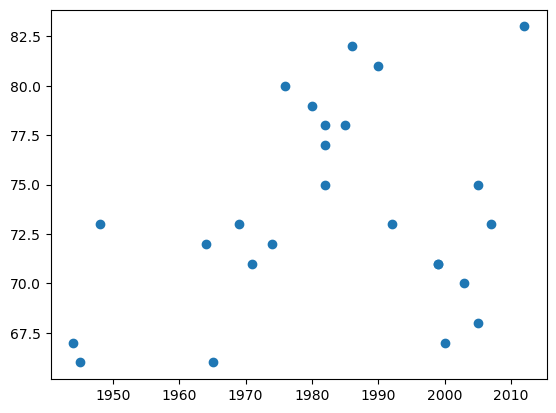

In [6]:
Oscar_con_coordenadas1 = Oscar_con_coordenadas.query("Age > 65")

# Create the scatter plot
plt.scatter(Oscar_con_coordenadas1["year_of_award_gold"], Oscar_con_coordenadas1["Age"])

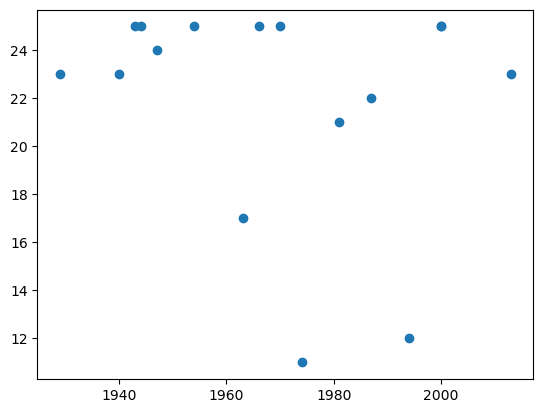

In [7]:
Oscar_con_coordenadas2 = Oscar_con_coordenadas.query("Age <= 25")
plt.scatter(Oscar_con_coordenadas2["year_of_award_gold"], Oscar_con_coordenadas2["Age"])

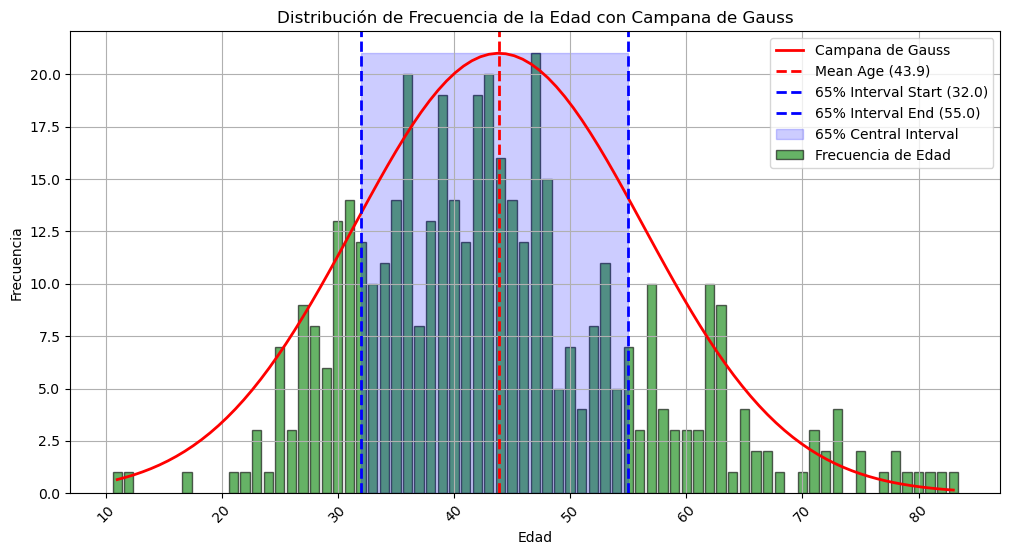

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Asumiendo que Oscar_con_coordenadas es tu DataFrame y "Age" es la columna de interés
x = Oscar_con_coordenadas["Age"]

# Contar la frecuencia de cada edad
age_counts = x.value_counts().sort_index()

# Calcular la media y la desviación estándar
mean_age = x.mean()
std_dev_age = x.std()

# Ajustar una distribución normal
xmin, xmax = x.min(), x.max()
x_values = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x_values, mean_age, std_dev_age)

plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values, color="g", edgecolor='black', alpha=0.6, label='Frecuencia de Edad')

plt.plot(x_values, pdf * max(age_counts.values) / max(pdf), 'r-', lw=2, label='Campana de Gauss')

# Calcular el intervalo central del 65%
percentile_32_5 = x.quantile(0.175)  # 65% de intervalo central -> 17.5% a cada lado
percentile_97_5 = x.quantile(0.825)

plt.axvline(mean_age, color='r', linestyle='--', linewidth=2, label=f'Mean Age ({mean_age:.1f})')
plt.axvline(percentile_32_5, color='b', linestyle='--', linewidth=2, label=f'65% Interval Start ({percentile_32_5:.1f})')
plt.axvline(percentile_97_5, color='b', linestyle='--', linewidth=2, label=f'65% Interval End ({percentile_97_5:.1f})')

plt.fill_betweenx([0, max(age_counts.values)], percentile_32_5, percentile_97_5, color='blue', alpha=0.2, label='65% Central Interval')

plt.title('Distribución de Frecuencia de la Edad con Campana de Gauss')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


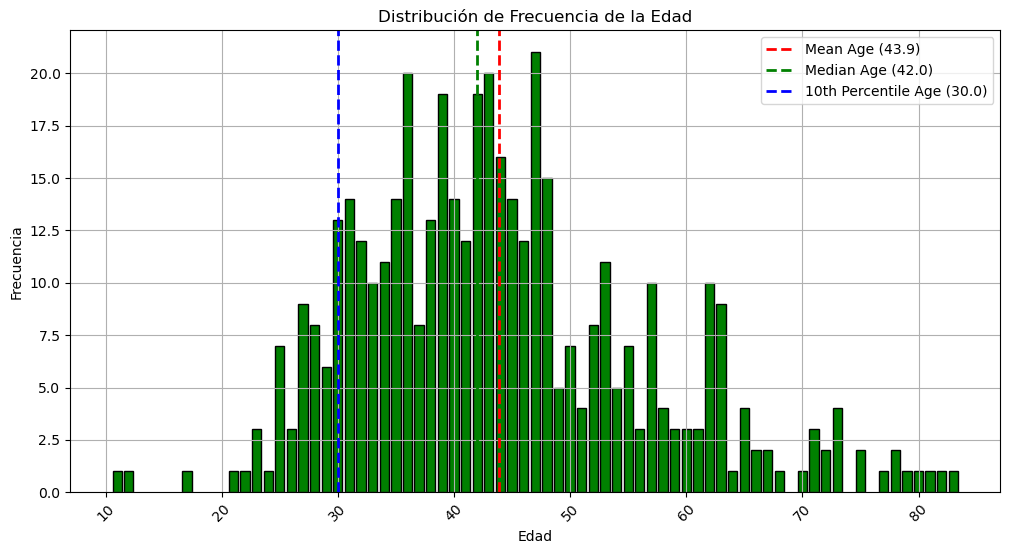

In [65]:
import matplotlib.pyplot as plt

# Asumiendo que Oscar_con_coordenadas es tu DataFrame y "Age" es la columna de interés
x = Oscar_con_coordenadas["Age"]

# Contar la frecuencia de cada edad
age_counts = x.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values, color="g", edgecolor='black')

mean_age = x.mean()
median_age = x.median()
percentil_10 = x.quantile(0.1)

plt.axvline(mean_age, color='r', linestyle='--', linewidth=2, label=f'Mean Age ({mean_age:.1f})')
plt.axvline(median_age, color='g', linestyle='--', linewidth=2, label=f'Median Age ({median_age:.1f})')
plt.axvline(percentil_10, color='b', linestyle='--', linewidth=2, label=f'10th Percentile Age ({percentil_10:.1f})')

plt.title('Distribución de Frecuencia de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



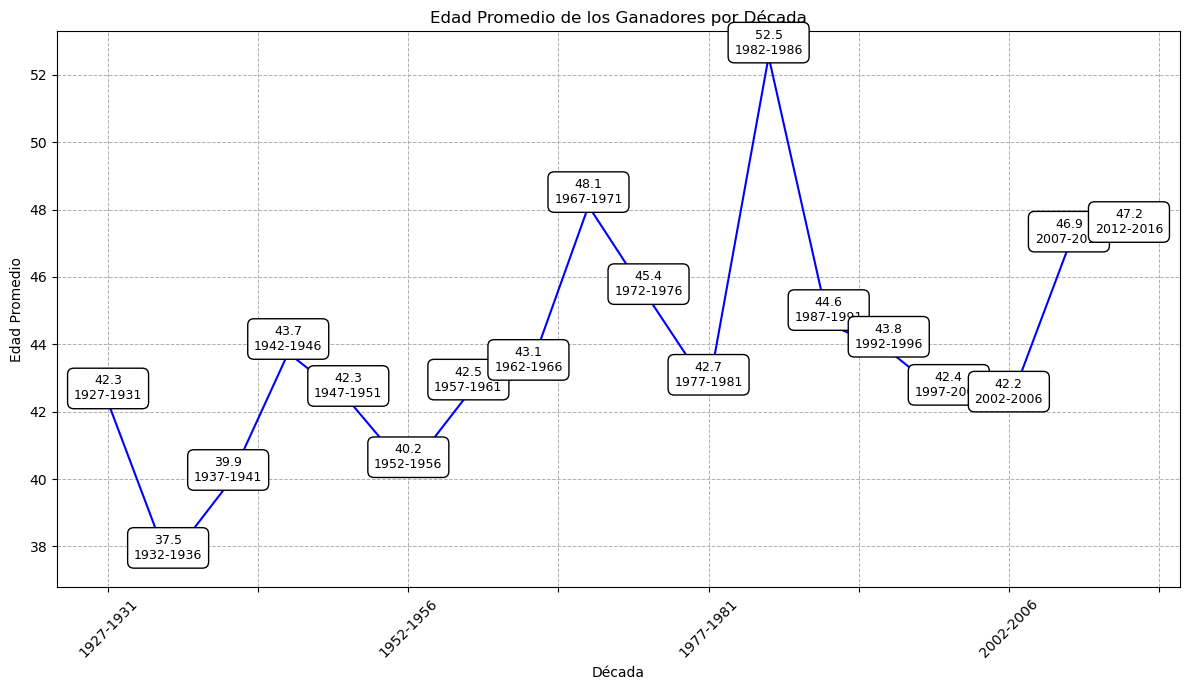

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
bins = range(int(Oscar_con_coordenadas["year_of_award"].min()), int(Oscar_con_coordenadas["year_of_award"].max()) + 5, 5)
labels = [f"{start}-{start+4}" for start in bins[:-1]]  # Intervalos de 5 años

Oscar_con_coordenadas['decade'] = pd.cut(Oscar_con_coordenadas["year_of_award"], bins=bins, labels=labels, right=False)
edad_promedio_por_decada = Oscar_con_coordenadas.groupby('decade')['Age'].mean()

# Graficar
plt.figure(figsize=(12, 7))
ax = edad_promedio_por_decada.plot(marker='o', linestyle='-', color='b')

# Añadir anotaciones
for x, (decade, age) in enumerate(edad_promedio_por_decada.items()):
    plt.text(x, age, f'{age:.1f}\n{decade}', ha='center', va='bottom', fontsize=9, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel('Década')
plt.ylabel('Edad Promedio')
plt.title('Edad Promedio de los Ganadores por Década')
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [6]:
porcentajes_orientacion = Oscar_con_coordenadas["sexual_orientation"].value_counts(normalize=True) * 100
print(porcentajes_orientacion)


sexual_orientation
Straight             92.517007
Bisexual              4.761905
Gay                   1.587302
Matter of Dispute     0.680272
Lesbian               0.453515
Name: proportion, dtype: float64


In [38]:
proporciones_por_decada = Oscar_con_coordenadas.groupby(['decade', 'sexual_orientation']).size().unstack().fillna(0)

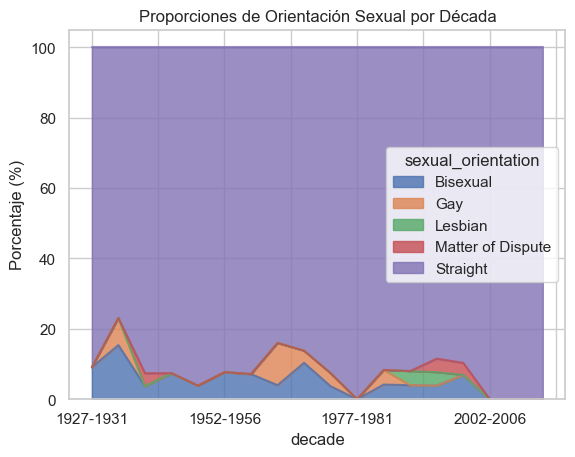

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame Oscar_con_coordenadas con las columnas 'decade' y 'sexual_orientation'

# Calcular las proporciones por década y orientación sexual
proporciones_por_decada = Oscar_con_coordenadas.groupby(['decade', 'sexual_orientation']).size().unstack().fillna(0)

# Convertir a porcentajes
proporciones_por_decada = proporciones_por_decada.div(proporciones_por_decada.sum(axis=1), axis=0) * 100

# Graficar
proporciones_por_decada.plot.area(alpha = 0.8)
plt.ylabel('Porcentaje (%)')
plt.title('Proporciones de Orientación Sexual por Década')
plt.show()


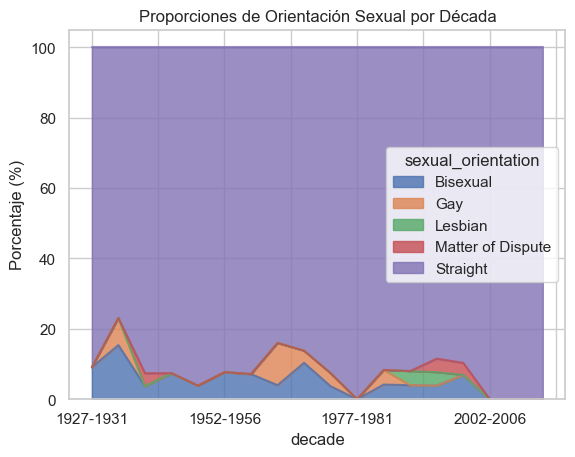

In [47]:
Oscar_con_coordenadas.pivot_table(index='decade', columns='sexual_orientation', aggfunc='size', fill_value=0) \
    .apply(lambda x: x / x.sum() * 100, axis=1) \
    .plot.area(alpha= 0.8)

plt.ylabel('Porcentaje (%)')
plt.title('Proporciones de Orientación Sexual por Década')
plt.show()

In [7]:
Oscar_con_coordenadas.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold',
       'Coordinates', 'Age', 'decade'],
      dtype='object')

In [17]:
print(Oscar_con_coordenadas['religion'] == 'Na')

0      False
1      False
2      False
3      False
4      False
       ...  
436    False
437    False
438    False
439    False
440    False
Name: religion, Length: 441, dtype: bool


In [9]:

Oscar_con_coordenadas.loc[Oscar_con_coordenadas['religion'] == 'Na', 'religion'] = 'Roman_Catholic'



In [18]:
Oscar_con_coordenadas.loc[Oscar_con_coordenadas.query('religion == "Na"').index, 'religion'] = 'Roman_Catholic'


In [4]:
create_map_folium(r"C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Proyecto_7_Organizacion_Presentación_Esteban_Freudenberg_UDD\Github_Proyecto_7\Proyectos-Pregrado\Data_used\processed\Oscars_con_coordenadas.csv")

In [60]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

# Adding 'gender' column to the DataFrame if it does not exist
if 'gender' not in Oscar_con_coordenadas.columns:
    Oscar_con_coordenadas['gender'] = np.nan

def actualizar_genero(data: pd.DataFrame) -> pd.DataFrame:
    """Realiza scrapping del género en la página encontrada en la columna 'biourl'."""
    
    cols = ['biourl', 'person', 'gender']
    for index, row in data[data[cols].isnull().any(axis=1)][cols].iterrows():
        url = row['biourl']
        person_name = row['person']
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an HTTPError for bad responses
            
            soup = BeautifulSoup(response.content, "html.parser")
            
            # Encuentra el texto que sigue a "Gender:"
            gender_info = soup.find("b", string="Gender:").next_sibling.strip()
                
            # Actualiza el DataFrame con la información del género
            data.loc[data['person'] == person_name, 'gender'] = gender_info

        except requests.RequestException as e:
            print(f"Error accessing the page {url}: {e}")
        except Exception as e:
            print(f"Error processing the data for {person_name}: {e}")
        
    return data

Oscar_con_coordenadas = actualizar_genero(Oscar_con_coordenadas)


KeyboardInterrupt: 

In [58]:
url= "https://www.nndb.com/people/292/000044160/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
soup.find("p")


<p><img align="right" alt="Frank Borzage" height="263" hspace="10" src="borzage3-sized.jpg" vspace="10" width="207"/><b>Born:</b> <a class="proflink" href="/lists/631/000106313/">23-Apr</a>-<a class="proflink" href="/lists/893/000105578/">1894</a><br/><b>Birthplace:</b> <a class="proflink" href="/geo/692/000069485/">Salt Lake City, UT</a><br/><b>Died:</b> <a class="proflink" href="/lists/057/000106736/">19-Jun</a>-<a class="proflink" href="/lists/472/000106154/">1962</a><br/><b>Location of death:</b> <a class="proflink" href="/geo/536/000069329/">Hollywood, CA</a><br/><b>Cause of death:</b> <a class="proflink" href="/lists/350/000069143/">Cancer - unspecified</a><br/><b>Remains:</b> Buried, <a class="proflink" href="/cemetery/649/000208025/">Forest Lawn Memorial Park Cemetery, Glendale, CA</a><br/><p><b>Gender:</b> Male<br/><b>Religion:</b> <a class="proflink" href="/lists/758/000094476/">Roman Catholic</a><br/><b>Race or Ethnicity:</b> White<br/><b>Sexual orientation:</b> Straight<br/

In [48]:
gender 

[<b><font face="Verdana, Arial, Helvetica, sans-serif" size="-1">This is a beta version of NNDB</font></b>,
 <b><font face="Verdana, Arial, Helvetica, sans-serif" size="-1">
 <form action="http://search.nndb.com/search/nndb.cgi" method="get">
 <input name="nndb" type="hidden" value="1"/>
 <nobr>Search: 
       <select name="omenu">
 <option selected="" value="unspecified">All Names</option>
 <option value="living">Living people</option>
 <option value="dead">Dead people</option>
 <option value="bands">Band Names</option>
 <option value="books">Book Titles</option>
 <option value="movies">Movie Titles</option>
 <option value="fulltext">Full Text</option>
 </select>
       for 
       <input maxlength="96" name="query" size="24" value=""/>
 <input type="submit" value="Search"/>
 </nobr></form></font></b>,
 <b>Frank Borzage</b>,
 <b>Born:</b>,
 <b>Birthplace:</b>,
 <b>Died:</b>,
 <b>Location of death:</b>,
 <b>Cause of death:</b>,
 <b>Remains:</b>,
 <b>Gender:</b>,
 <b>Religion:</b>,
 <b>

Primera idea: Ver como cambia, atravz del tiempo, la proporcion de entrega de premios en los continentes y paises.

Grafico de barras apiladas
x --> Total de premios por pais/Continente cada 5 años o 10 años.
y --> Paises/continentes.

Segunda idea:

Edad de los ganadores por cada 5 o 10 años.  Edad promedio de los ganadores por año? por sexo?

Tercera idea idea:  Paises con mayo numero de premios.
Grafico de barras

Cuarta idea: Moment of sexual orientation get more diverse

Quinta idea: Momento of race ethnicity get more diverse

Sexta idea: Asociacion entre orientacíon sexual y el tipo de award.


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def fetch_books(page_number):
  url = f"https://www.imdb.com/find/?q={Nombre_pelicula}&ref_=nv_sr_sm"
  response = requests.get(url,  headers={"User-Agent": "Chrome"})
  soup = BeautifulSoup(response.text, 'html.parser')

  books = []
  book_elements = soup.find_all('article', class_='product_pod')

# <h3 class="ipc-titles__text"> "Títulos"

  for book in book_elements:
    #title = book.find('h3').find('a')['title']
    #price = book.find('p', class_='price_color').text
    #stock = 'In stock' if 'In stock' in book.find('p', class_='instock availability').text else 'Out of stock'
    #rating = book.find('p', class_='star-rating')['class'][1]
    #link = book.find('h3').find('a')['href']

    books.append({
      'title': title,
      'price': price,
      'stock': stock,
      'rating': rating,
      'link': f"https://books.toscrape.com/catalogue/{link}"
    })

  return books

def main():
  all_books = []
  max_pages = 10

  for current_page in range(1, max_pages + 1):
    books_on_page = fetch_books(current_page)
    all_books.extend(books_on_page)
    print(f"Books on page {current_page}: {books_on_page}")

  # Save data to file
  with open('books.json', 'w') as f:
    json.dump(all_books, f, indent=2)

  print('Data is saved to books.json')

if __name__ == "__main__":
  main()

In [56]:
# Ensure the column is of type string
Oscar_con_coordenadas["movie"] = Oscar_con_coordenadas["movie"].astype(str)

# Replace underscores with spaces
Oscar_con_coordenadas["movie"] = Oscar_con_coordenadas["movie"].apply(lambda x: x.replace("_", " "))

In [ ]:
elements = soup2.find_all("a", class_ = "ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link")
for element in elements:
    print(element.get_text())

In [67]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import os

# Assuming 'Oscar_con_coordenadas' is your DataFrame with a 'movie' column
# Load previous results if they exist
output_file = "imdb_genres.csv"
if os.path.exists(output_file):
    results_df = pd.read_csv(output_file)
    processed_movies = set(results_df["movie"].tolist())
else:
    results_df = pd.DataFrame(columns=["movie", "movie_id", "genres"])
    processed_movies = set()

# Start scraping
for Nombre_pelicula in Oscar_con_coordenadas["movie"]:
    if Nombre_pelicula in processed_movies:
        continue

    url = f"https://www.imdb.com/find/?q={Nombre_pelicula}&ref_=nv_sr_sm"
    response1 = requests.get(url, headers={"User-Agent": "Chrome"})
    soup1 = BeautifulSoup(response1.text, 'html.parser')

    try:
        movie_id = re.search(r'/title/(tt\d+)/', soup1.find('li', class_="find-result-item").find('a')['href']).group(1)
    except Exception as e:
        try:
            if Nombre_pelicula == "Skippy":
                movie_id = re.search(r'/title/(tt\d+)/', soup1.find_all('li', class_="find-result-item")[5].find('a')['href']).group(1)
            elif Nombre_pelicula == "All Quiet on the Western Front":
                movie_id = re.search(r'/title/(tt\d+)/', soup1.find_all('li', class_="find-result-item")[0].find('a')['href']).group(1)
            elif Nombre_pelicula == "Bad Girl":
                movie_id = re.search(r'/title/(tt\d+)/', soup1.find_all('li', class_="find-result-item")[8].find('a')['href']).group(1)
            elif Nombre_pelicula == "Marty":
                movie_id = re.search(r'/title/(tt\d+)/', soup1.find_all('li', class_="find-result-item")[5].find('a')['href']).group(1)
            elif Nombre_pelicula == "Gigi":
                movie_id = re.search(r'/title/(tt\d+)/', soup1.find_all('li', class_="find-result-item")[6].find('a')['href']).group(1)
            else:
                raise e  # Re-raise the exception if the movie doesn't match any special cases
        except Exception as e:
            print(f"Error processing movie: {Nombre_pelicula}, Error: {e}")
            continue

    # Access the movie's main page and scrape genres
    url_level_1 = f"https://www.imdb.com/title/{movie_id}/?ref_=fn_al_tt_1"
    response2 = requests.get(url_level_1, headers={"User-Agent": "Chrome"})
    soup2 = BeautifulSoup(response2.text, 'html.parser')
    genres = [span.text for span in soup2.select("div.ipc-chip-list__scroller span.ipc-chip__text")]

    # Add the new row to the DataFrame
    new_row = pd.DataFrame({"movie": [Nombre_pelicula], "movie_id": [movie_id], "genres": [", ".join(genres)]})
    results_df = pd.concat([results_df, new_row], ignore_index=True)
    results_df.to_csv(output_file, index=False)
    print(f"Movie ID: {movie_id} Name: {Nombre_pelicula}")
    print(f"Genres: {genres}")

# Final save after loop completes
results_df.to_csv(output_file, index=False)


Movie ID: tt0018515 Name: Two Arabian Knights
Genres: ['Adventure', 'Comedy', 'Romance']
Movie ID: tt0019824 Name: The Divine Lady
Genres: ['Drama', 'History', 'Romance', 'War']
Movie ID: tt0020629 Name: All Quiet on the Western Front
Genres: ['Epic', 'Period Drama', 'Psychological Drama', 'Tragedy', 'War Epic', 'Drama', 'War']
Movie ID: tt0060025 Name: Skippy
Genres: ['Adventure', 'Drama', 'Family']
Movie ID: tt0021635 Name: Bad Girl
Genres: ['Drama', 'Romance']
Movie ID: tt0023876 Name: Cavalcade
Genres: ['Period Drama', 'Tragic Romance', 'Drama', 'Romance', 'War']
Movie ID: tt0025316 Name: It Happened One Night
Genres: ['Road Trip', 'Comedy', 'Romance']
Movie ID: tt1833116 Name: The Informer
Genres: ['Police Procedural', 'Prison Drama', 'Spy', 'Action', 'Crime', 'Drama', 'Thriller']
Movie ID: tt0027996 Name: Mr Deeds Goes to Town
Genres: ['Screwball Comedy', 'Comedy', 'Drama', 'Romance']
Movie ID: tt0028597 Name: The Awful Truth
Genres: ['Romantic Comedy', 'Screwball Comedy', 'Comed

In [99]:
Movie_Gender = pd.read_csv(r"C:\Users\Usuario\OneDrive - udd.cl\Datos adjuntos\Bootcamp ciencia de datos\Modulo 7\Espacio_Trabajo_Oscars\Proyectos-Pregrado\Jupyter Notebooks\imdb_genres.csv")

In [100]:
# Primero, ordena los DataFrames por la columna 'movie'
sorted_oscar = Oscar_con_coordenadas.sort_values("movie")
sorted_gender = Movie_Gender.sort_values("movie")

# Realiza el merge para agregar los géneros a sorted_oscar solo cuando los nombres coincidan
merged_df = sorted_oscar.merge(sorted_gender[["movie", "genres"]], on="movie", how="left")



In [104]:
del merged_df["Coordinates"]


In [108]:
merged_df.drop_duplicates(inplace=True)

In [112]:
merged_df.reset_index(inplace=True, drop=True)

In [121]:
merged_df["genres"].isnull().sum()

10

In [124]:
filtered_df = merged_df.query('genres.isna()')


In [125]:
filtered_df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold,genres
136,670454705,False,finalized,3,2/10/15 4:08,Newtonville_Ma,1.0,1886-01-03,1.0,White,...,http://www.nndb.com/people/087/000063895/,Newtonville_Ma,1886-01-03,Harvey,Josephine_Hull,White,Na,Straight,1951,NaN
149,670454591,False,finalized,3,2/10/15 2:05,Lincoln_Lincolnshire_England,1.0,1949-05-24,1.0,White,...,http://www.nndb.com/people/092/000063900/,Lincoln_Lincolnshire_England,1949-05-24,Iris,Jim_Broadbent,White,Na,Straight,2002,NaN
160,670454567,False,finalized,3,2/10/15 1:53,Chicago_Il,1.0,1922-07-26,1.0,White,...,http://www.nndb.com/people/224/000032128/,Chicago_Il,1922-07-26,Julia,Jason_Robards,White,Na,Straight,1978,NaN
161,670454732,False,finalized,3,2/10/15 2:06,London_England,1.0,1937-01-30,1.0,White,...,http://www.nndb.com/people/590/000023521/,London_England,1937-01-30,Julia,Vanessa_Redgrave,White,Na,Straight,1978,NaN
227,670454395,False,finalized,3,2/10/15 2:29,London_England,1.0,1906-12-30,1.0,White,...,http://www.nndb.com/people/290/000064098/,London_England,1906-12-30,Oliver,Carol_Reed,White,Na,Straight,1969,NaN
240,670454397,False,finalized,3,2/10/15 3:56,Tokyo_Japan,1.0,1920-05-30,1.0,White,...,http://www.nndb.com/people/509/000032413/,Tokyo_Japan,1920-05-30,Patton,Franklin_J_Schaffner,White,Na,Straight,1970,NaN
241,670454482,False,finalized,3,2/10/15 1:57,Wise_Va,1.0,1927-10-18,1.0,White,...,http://www.nndb.com/people/025/000022956/,Wise_Va,1927-10-18,Patton,George_C_Scott,White,Na,Straight,1971,NaN
253,670454500,False,finalized,3,2/10/15 1:58,Los_Angeles_Ca,1.0,1937-08-08,1.0,White,...,http://www.nndb.com/people/882/000022816/,Los_Angeles_Ca,1937-08-08,Rainman,Dustin_Hoffman,White,Jewish,Straight,1989,NaN
254,670454516,False,finalized,3,2/10/15 2:02,Terrell_Tx,1.0,1967-12-13,1.0,Black,...,http://www.nndb.com/people/113/000026035/,Terrell_Tx,1967-12-13,Ray,Jamie_Foxx,Black,Baptist,Straight,2005,NaN
312,670454444,False,finalized,3,2/10/15 1:59,Kansas_City_Mo,1.0,1885-04-01,1.0,White,...,http://www.nndb.com/people/976/000043847/,Kansas_City_Mo,1885-04-01,The Champ,Wallace_Beery,White,Na,Straight,1932,NaN


In [113]:
for column in merged_df.columns:
    if merged_df[column].apply(lambda x: isinstance(x, list)).any():
        print(f"Column with lists: {column}")

In [9]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import os
Nombre_pelicula = "The mission"
url = f"https://www.imdb.com/find/?q={Nombre_pelicula}&ref_=nv_sr_sm"
response1 = requests.get(url, headers={"User-Agent": "Chrome"})
soup1 = BeautifulSoup(response1.content, 'html.parser')

div,noscript,head,link,herf,div,id=,type,class=,nav,svg, input,aside, a,g ,rect, path, label, span, ul,li,role=,fill=,d=,main,stop,defs,ha,section,img,button,hgroup,h3,footer,mas,use

In [39]:
soup1.find_all("a")

[<a href="/?ref_=nv_home"><svg class="ipc-logo drawer-logo" height="56" version="1.1" viewbox="0 0 64 32" width="98" xmlns="http://www.w3.org/2000/svg"><g fill="#F5C518"><rect height="100%" rx="4" width="100%" x="0" y="0"></rect></g><g fill="#000000" fill-rule="nonzero" transform="translate(8.000000, 7.000000)"><polygon points="0 18 5 18 5 0 0 0"></polygon><path d="M15.6725178,0 L14.5534833,8.40846934 L13.8582008,3.83502426 C13.65661,2.37009263 13.4632474,1.09175121 13.278113,0 L7,0 L7,18 L11.2416347,18 L11.2580911,6.11380679 L13.0436094,18 L16.0633571,18 L17.7583653,5.8517865 L17.7707076,18 L22,18 L22,0 L15.6725178,0 Z"></path><path d="M24,18 L24,0 L31.8045586,0 C33.5693522,0 35,1.41994415 35,3.17660424 L35,14.8233958 C35,16.5777858 33.5716617,18 31.8045586,18 L24,18 Z M29.8322479,3.2395236 C29.6339219,3.13233348 29.2545158,3.08072342 28.7026524,3.08072342 L28.7026524,14.8914865 C29.4312846,14.8914865 29.8796736,14.7604764 30.0478195,14.4865461 C30.2159654,14.2165858 30.3021941,13.486

In [65]:
Oscar_con_coordenadas.query('movie == "Gigi"')


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold,Coordinates
31,670454384,False,finalized,3,2/10/15 1:52,Chicago_Il,1.0,1903-02-28,1.0,White,...,http://www.nndb.com/people/825/000032729/,Chicago_Il,1903-02-28,Gigi,Vincente_Minnelli,White,Na,Bisexual,1959,"[41.878113, -87.629799]"


In [58]:
elements = soup2.find_all('li', class_="find-result-item")
elements[0]

IndexError: list index out of range

In [64]:
elements = soup1.find_all("li", class_ = "find-result-item")
for element in elements:
    print(element.get_text())

Ginnifer Goodwinaka "Gigi"
Gigi EdgleyActress, Farscape (1999–2003)
Gigi HadidActress, Ocean's 8: Las estafadoras (2018)
Gigi PerreauActress, Shadow on the Wall (1950)
Gigi RiceActress, A Night at the Roxbury (1998)
Gigi1958Leslie Caron, Maurice Chevalier
Gigi & Nate2022Charlie Rowe, Marcia Gay Harden
Gigi1949Gaby Morlay, Jean Tissier
Gigi2024Short
Wendy/Gigi2020TV ShortShana Goodman, Rachel Music


In [15]:
Oscar["birthplace"].unique()

array(['Chisinau_Moldova', 'Rorschach_Switzerland', 'Philadelphia_Pa',
       'Glasgow_Scotland', 'London_England', 'Columbus_Oh',
       'Toronto_Ontario_Canada', 'Montreal_Quebec_Canada',
       'Cobourg_Ontario_Canada', 'Washington_Dc', 'Kansas_City_Mo',
       'Chicago_Il', 'Salt_Lake_City_Ut', 'Hartford_Ct',
       'Victoria_Hotel_Scarborough_Yorkshire_England', 'Paris_France',
       'Bisacquino_Sicily_Italy', 'Cadiz_Oh', 'Lowell_Ma',
       'Cape_Elizabeth_Me', 'Tunbridge_Wells_Kent_England',
       'Lviv_Ukraine', 'Dusseldorf_Germany', 'Litchfield_Mn',
       'Milwaukee_Wi', 'Swampscott_Ma', 'Vienna_Austria',
       'Los_Angeles_Ca', 'New_York_City', 'Darjeeling_India',
       'Elizabeth_Nj', 'Withington_Manchester_England', 'Tokyo_Japan',
       'Pasadena_Ca', 'Wichita_Ks', 'Indiana_Pa', 'Independence_Mo',
       'Palmyra_Mo', 'Quincy_Il', 'Helena_Mt',
       'Mulhouse_HautRhin_Alsace_France', 'Walters_Ok', 'Manhattan_Ny',
       'Budapest_Hungary', 'Athens_Greece', 'Tulsa_Ok'

In [13]:
Oscar["award"].value_counts()

award
Best_Actress               95
Best_Director              91
Best_Actor                 88
Best_Supporting_Actress    85
Best_Supporting_Actor      82
Name: count, dtype: int64